In [47]:
import numpy as np
import math
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Context 
A common risk control method that banks and generally the financial industry use is credit score cards . Personal information and data are extracted by people's applications , to be used in prediction models for the likelyhood of future defaults and credit card borrowins , based on that the bank is able to make more accurate decisions on issuing credit cards to the applicants . 

So in the context of a course in Big Data , in AUEB Management Science and Technology we will use a dataset we extracted from [Kaggle](https://www.kaggle.com/rikdifos/credit-card-approval-prediction) to build such predictive models . 

**Iliadis Viktoras Giannis Vagionakis Andreas Sofos**

## ETL Process

We read the files the files we extracted from the [Credit Card Approval Prediction Kaggle Dataset](https://www.kaggle.com/rikdifos/credit-card-approval-prediction)  with the help of .read_csv from pandas . 
The data is only in csv format , 

### Extraction  and Data Overview

In [48]:
ApplicationDF = pd.read_csv("Bank Data/application_record.csv")
CreditDF =  pd.read_csv("Bank Data/credit_record.csv")

### Application Table Context and Explanation
| Feature name        | Explanation              |
|---------------------|--------------------------|
| ID                  | Client number            |
| CODE_GENDER         | Gender                   |
| FLAG_OWN_CAR        | Is there a car           |
| FLAG_OWN_REALTY     | Is there a property      |
| CNT_CHILDREN        | Number of children       |
| AMT_INCOME_TOTAL    | Annual income            |
| NAME_INCOME_TYPE    | Income category          |
| NAME_EDUCATION_TYPE | Education level          |
| NAME_FAMILY_STATUS  | Marital status           |
| NAME_HOUSING_TYPE   | Way of living            |
| DAYS_BIRTH          | Birthday                 |
| DAYS_EMPLOYED       | Start date of employment |
| FLAG_MOBIL          | Is there a mobile phone  |
| FLAG_WORK_PHONE     | Is there a work phone    |
| FLAG_PHONE          | Is there a phone         |
| FLAG_EMAIL          | Is there an email        |
| OCCUPATION_TYPE     | Occupation               |
| CNT_FAM_MEMBERS     | Family size              |

##### Note 

* On **DAYS_BIRTH**
Count backwards from current day (0), -1 means yesterday
* On **DAYS_EMPLOYED**
Count backwards from current day(0). If positive, it means the person currently unemployed.


In [49]:
print(ApplicationDF.shape)
print(ApplicationDF.dtypes)
ApplicationDF.head(10)

(438557, 18)
ID                       int64
CODE_GENDER             object
FLAG_OWN_CAR            object
FLAG_OWN_REALTY         object
CNT_CHILDREN             int64
AMT_INCOME_TOTAL       float64
NAME_INCOME_TYPE        object
NAME_EDUCATION_TYPE     object
NAME_FAMILY_STATUS      object
NAME_HOUSING_TYPE       object
DAYS_BIRTH               int64
DAYS_EMPLOYED            int64
FLAG_MOBIL               int64
FLAG_WORK_PHONE          int64
FLAG_PHONE               int64
FLAG_EMAIL               int64
OCCUPATION_TYPE         object
CNT_FAM_MEMBERS        float64
dtype: object


,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
5,5008810,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
6,5008811,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
7,5008812,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House / apartment,-22464,365243,1,0,0,0,NaN,1.0
8,5008813,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House / apartment,-22464,365243,1,0,0,0,NaN,1.0
9,5008814,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House / apartment,-22464,365243,1,0,0,0,NaN,1.0


### Credit Table Context and Explanation

| Feature name   | Explanation   |
|----------------|---------------|
| ID             | Client number |
| Months Balance | Record Month  |
| STATUS         | Status        |

* On **MONTHS_BALANCE**
The month of the extracted data is the starting point, backwards, 0 is the current month, -1 is the previous month, and so on
* On **STATUS**
0: 1-29 days past due 1: 30-59 days past due 2: 60-89 days overdue 3: 90-119 days overdue 4: 120-149 days overdue 5: Overdue or bad debts, write-offs for more than 150 days C: paid off that month X: No loan for the month

In [50]:
print(CreditDF.shape)
print(CreditDF.dtypes)
CreditDF.head(10)

(1048575, 3)
ID                 int64
MONTHS_BALANCE     int64
STATUS            object
dtype: object


,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C
5,5001712,-1,C
6,5001712,-2,C
7,5001712,-3,C
8,5001712,-4,C
9,5001712,-5,C


### Transformation - Application and Credit Data

Let's start with the Application dataset starting with checking for missing data . 

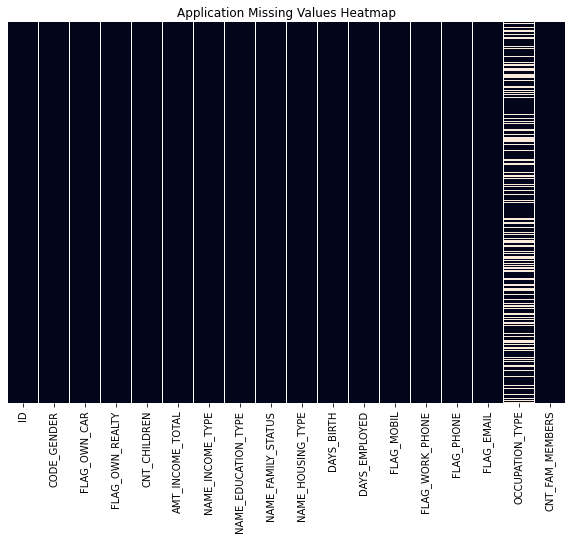

ID                          0
CODE_GENDER                 0
FLAG_OWN_CAR                0
FLAG_OWN_REALTY             0
CNT_CHILDREN                0
AMT_INCOME_TOTAL            0
NAME_INCOME_TYPE            0
NAME_EDUCATION_TYPE         0
NAME_FAMILY_STATUS          0
NAME_HOUSING_TYPE           0
DAYS_BIRTH                  0
DAYS_EMPLOYED               0
FLAG_MOBIL                  0
FLAG_WORK_PHONE             0
FLAG_PHONE                  0
FLAG_EMAIL                  0
OCCUPATION_TYPE        134203
CNT_FAM_MEMBERS             0
dtype: int64


In [51]:
#set figure size
plt.figure(figsize=(10,7))
#generate heatmap
sns.heatmap(ApplicationDF.isnull(), cbar=False)
#labels and titles
plt.title("Application Missing Values Heatmap")
plt.yticks([])
plt.show()
print(ApplicationDF.isnull().sum())

**We can see that the occupation type  has an enormous amount of missing values so we thought that it was best to drop the column entirely ( 31% of column was Null) and not fill it with the AVG values or something else.**

In [52]:
ApplicationDF = ApplicationDF.drop(columns=['OCCUPATION_TYPE'])

Now Lets check for missing values in the Credit DF 

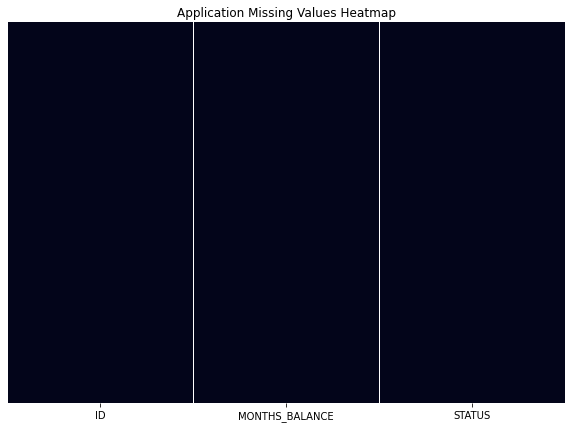

ID                0
MONTHS_BALANCE    0
STATUS            0
dtype: int64


In [53]:
#set figure size
plt.figure(figsize=(10,7))
#generate heatmap
sns.heatmap(CreditDF.isnull(), cbar=False)
#labels and titles
plt.title("Application Missing Values Heatmap")
plt.yticks([])
plt.show()
print(CreditDF.isnull().sum())

##### Checking for Duplicate values

We continue by checking for duplicate values in the Application Dataset starting  dropping the duplicates we found 

In [54]:
ApplicationDF = ApplicationDF.drop_duplicates('ID', keep='last')

#### Transform non numeric data columns into numeric
We see that we have a lot of columns that have non numeric values that we can't use in our analysis, so we have to replace them

In [55]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for x in ApplicationDF:
    if ApplicationDF[x].dtypes=='object':
        ApplicationDF[x] = le.fit_transform(ApplicationDF[x])

This method applies 0,1.. classification to different value types.

In [56]:
ApplicationDF.head(10)

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS
0,5008804,1,1,1,0,427500.0,4,1,0,4,-12005,-4542,1,1,0,0,2.0
1,5008805,1,1,1,0,427500.0,4,1,0,4,-12005,-4542,1,1,0,0,2.0
2,5008806,1,1,1,0,112500.0,4,4,1,1,-21474,-1134,1,0,0,0,2.0
3,5008808,0,0,1,0,270000.0,0,4,3,1,-19110,-3051,1,0,1,1,1.0
4,5008809,0,0,1,0,270000.0,0,4,3,1,-19110,-3051,1,0,1,1,1.0
5,5008810,0,0,1,0,270000.0,0,4,3,1,-19110,-3051,1,0,1,1,1.0
6,5008811,0,0,1,0,270000.0,0,4,3,1,-19110,-3051,1,0,1,1,1.0
7,5008812,0,0,1,0,283500.0,1,1,2,1,-22464,365243,1,0,0,0,1.0
8,5008813,0,0,1,0,283500.0,1,1,2,1,-22464,365243,1,0,0,0,1.0
9,5008814,0,0,1,0,283500.0,1,1,2,1,-22464,365243,1,0,0,0,1.0


#### Detect outliers
We are going to check if there are outliers in our data that may affect our analysis results

<AxesSubplot:xlabel='ID', ylabel='CNT_FAM_MEMBERS'>

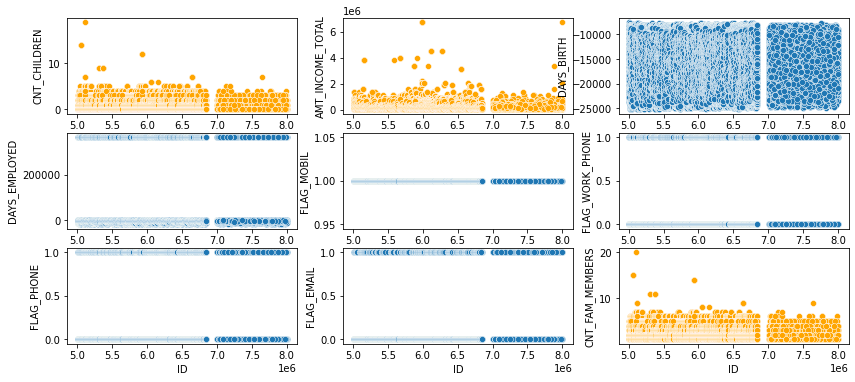

In [57]:
fig, ax= plt.subplots(nrows= 3, ncols = 3, figsize= (14,6))

sns.scatterplot(x='ID', y='CNT_CHILDREN', data=ApplicationDF, ax=ax[0][0], color= 'orange')
sns.scatterplot(x='ID', y='AMT_INCOME_TOTAL', data=ApplicationDF, ax=ax[0][1], color='orange')
sns.scatterplot(x='ID', y='DAYS_BIRTH', data=ApplicationDF, ax=ax[0][2])
sns.scatterplot(x='ID', y='DAYS_EMPLOYED', data=ApplicationDF, ax=ax[1][0])
sns.scatterplot(x='ID', y='FLAG_MOBIL', data=ApplicationDF, ax=ax[1][1])
sns.scatterplot(x='ID', y='FLAG_WORK_PHONE', data=ApplicationDF, ax=ax[1][2])
sns.scatterplot(x='ID', y='FLAG_PHONE', data=ApplicationDF, ax=ax[2][0])
sns.scatterplot(x='ID', y='FLAG_EMAIL', data=ApplicationDF, ax=ax[2][1])
sns.scatterplot(x='ID', y='CNT_FAM_MEMBERS', data=ApplicationDF, ax=ax[2][2], color= 'orange')

We see that there are outliers in 3 columns.
* CNT_CHILDREN
* AMT_INCOME_TOTAL
* CNT_FAM_MEMBERS

We need to remove these outliers to make sure they do not affect our model results.

We will now remove these outliers.

In [58]:
# FOR CNT_CHILDREN COLUMN
q_hi = ApplicationDF['CNT_CHILDREN'].quantile(0.999)
q_low = ApplicationDF['CNT_CHILDREN'].quantile(0.001)
ApplicationDF = ApplicationDF[(ApplicationDF['CNT_CHILDREN']>q_low) & (ApplicationDF['CNT_CHILDREN']<q_hi)]

In [68]:
# FOR CNT_CHILDREN COLUMN
q_hi = ApplicationDF['AMT_INCOME_TOTAL'].quantile(0.999)
q_low = ApplicationDF['AMT_INCOME_TOTAL'].quantile(0.001)
ApplicationDF = ApplicationDF[(ApplicationDF['AMT_INCOME_TOTAL']>q_low) & (ApplicationDF['AMT_INCOME_TOTAL']<q_hi)]

In [69]:
#FOR CNT_FAM_MEMBERS COLUMN
q_hi = ApplicationDF['CNT_FAM_MEMBERS'].quantile(0.999)
q_low = ApplicationDF['CNT_FAM_MEMBERS'].quantile(0.001)
ApplicationDF= ApplicationDF[(ApplicationDF['CNT_FAM_MEMBERS']>q_low) & (ApplicationDF['CNT_FAM_MEMBERS']<q_hi)]

<AxesSubplot:xlabel='ID', ylabel='CNT_FAM_MEMBERS'>

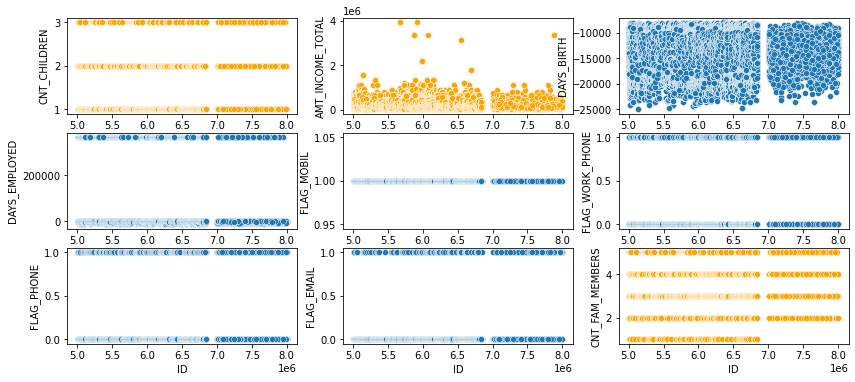

In [70]:
fig, ax= plt.subplots(nrows= 3, ncols = 3, figsize= (14,6))

sns.scatterplot(x='ID', y='CNT_CHILDREN', data=app, ax=ax[0][0], color= 'orange')
sns.scatterplot(x='ID', y='AMT_INCOME_TOTAL', data=app, ax=ax[0][1], color='orange')
sns.scatterplot(x='ID', y='DAYS_BIRTH', data=app, ax=ax[0][2])
sns.scatterplot(x='ID', y='DAYS_EMPLOYED', data=app, ax=ax[1][0])
sns.scatterplot(x='ID', y='FLAG_MOBIL', data=app, ax=ax[1][1])
sns.scatterplot(x='ID', y='FLAG_WORK_PHONE', data=app, ax=ax[1][2])
sns.scatterplot(x='ID', y='FLAG_PHONE', data=app, ax=ax[2][0])
sns.scatterplot(x='ID', y='FLAG_EMAIL', data=app, ax=ax[2][1])
sns.scatterplot(x='ID', y='CNT_FAM_MEMBERS', data=app, ax=ax[2][2], color= 'orange')

#### ID's in both datasets 
We see that we have a vast diffrence in the unique id's in the datasets , we can only keep the ones present in both dt to use in our models . 

In [45]:
print("Unique Applicants " , len(pd.unique(ApplicationDF['ID'])))
print("Unique Applicants with credit scores" , len(pd.unique(CreditDF['ID'])))
print("ID's Present in both datasets" , len(set(ApplicationDF['ID']).intersection(set(CreditDF['ID']))))

Unique Applicants  114187
Unique Applicants with credit scores 45985
ID's Present in both datasets 9516


We will join our datasets and keep only the data with ID's that are present in both datasets

In [46]:
df = ApplicationDF.join(CreditDF.set_index('ID'), on='ID', how='inner')
df.drop(['MONTHS_BALANCE'], axis=1, inplace=True)
df.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,STATUS
29,5008838,1,0,1,1,405000.0,0,1,1,1,-11842,-2016,1,0,0,0,3.0,X
29,5008838,1,0,1,1,405000.0,0,1,1,1,-11842,-2016,1,0,0,0,3.0,0
29,5008838,1,0,1,1,405000.0,0,1,1,1,-11842,-2016,1,0,0,0,3.0,0
29,5008838,1,0,1,1,405000.0,0,1,1,1,-11842,-2016,1,0,0,0,3.0,0
29,5008838,1,0,1,1,405000.0,0,1,1,1,-11842,-2016,1,0,0,0,3.0,0
